## 1. Import packages and load data 

In [83]:
import pandas as pd
import os 
#os => operating system
import matplotlib.pyplot as plt

In [6]:
path = '/Users/antonytran/Documents/code/test_1_data_science/Sales-Reporting-main/data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# 2.Clean and preprocess data

## 2.1 Get all the direction of 12 month data

In [7]:
os.listdir(path)

['.DS_Store',
 'sales2019_3.csv',
 'sales2019_2.csv',
 'sales2019_1.csv',
 'sales2019_5.csv',
 'sales2019_4.csv',
 'sales2019_12.csv',
 'sales2019_10.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_11.csv',
 'sales2019_9.csv',
 'sales2019_8.csv']

In [22]:
#We don't need .DS_Store ==> get only the file has endswith = .csv
#Merge data : pd.concat(dataframe)
frames = []
all_len = 0
for i in os.listdir(path):
    if i.endswith('.csv'):
        file_path = path + i
        df= pd.read_csv(file_path)
        frames.append(df)
        result = pd.concat(frames)
        #Check if merge succeed or not: sum all the length of all 12 file 
        len_1f = len(df.index)
        all_len= all_len + len_1f
df_12month = result
df_12month.to_csv('sale_all_12_month.csv',index = False)
df_12month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [15]:
#The same length 186850 ==> merge succeed
print(all_len)

186850


## 2.2 Add 'Month' column

In [34]:
#del df_12month['info']
df_12month['Month']=''
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",


### Slice substring 'month in Order Date column' to get only 'month' 

In [28]:
df_12month['Order Date']

0        03/28/19 20:59
1        03/28/19 20:59
2        03/28/19 20:59
3        03/17/19 05:39
4        03/10/19 00:01
              ...      
12006    08/29/19 22:19
12007    08/31/19 16:26
12008    08/02/19 07:25
12009    08/08/19 12:10
12010    08/16/19 08:13
Name: Order Date, Length: 186850, dtype: object

In [31]:
df_12month['Order Date'].str.slice(start=0,stop=2,step=1)
#or df_12month['Order Date'].str[0:2] ok too

0        03
1        03
2        03
3        03
4        03
         ..
12006    08
12007    08
12008    08
12009    08
12010    08
Name: Order Date, Length: 186850, dtype: object

In [37]:
df_12month['Month']= df_12month['Order Date'].str.slice(start=0,stop=2,step=1)
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [40]:
### check and see 'nan' 'Or'
print(set(df_12month['Month']))

{nan, '07', '09', '05', '12', '10', '11', '02', '08', '01', '03', '04', 'Or', '06'}


## Get rid of 'nan' & 'Or' value

In [50]:
#find nan index : df_12month[df_12month['Month']=='nan']
#delete all the row that don't have 'nan' value (mean 'Order Date' have no value) 
df_12month = df_12month.dropna(how='all')
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [51]:
print(set(df_12month['Month']))

{'07', '09', '05', '12', '10', '11', '02', '08', '01', '03', '04', 'Or', '06'}


In [52]:
#find nan index : df_12month[df_12month['Month']=='Or']
df_12month[df_12month['Month']=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
9605,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10217,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [53]:
#keep columns that do not contain Or = delete columns contain Or
df_12month = df_12month[df_12month['Month']!='Or']

In [55]:
print(set(df_12month['Month']))

{'07', '09', '05', '12', '10', '08', '02', '01', '03', '04', '11', '06'}


# What was the best month for sales? and how much was earned that month?

In [56]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [68]:
#in the first these are object
print(df_12month['Quantity Ordered'].dtype)
print(df_12month['Price Each'].dtype)

int8
float32


### Convert Object to numeric

In [67]:
df_12month['Price Each'] = pd.to_numeric(df_12month['Price Each'],downcast='float')

<ipython-input-67-1e3a9ecd73f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12month['Price Each'] = pd.to_numeric(df_12month['Price Each'],downcast='float')


In [71]:
df_12month['Sales']= df_12month['Quantity Ordered']* df_12month['Price Each']
df_12month.head()

<ipython-input-71-1ebe8ac660f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12month['Sales']= df_12month['Quantity Ordered']* df_12month['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


### Move column

In [78]:
moving_col = df_12month.pop('Sales')
df_12month.insert(4,'Sales',moving_col)
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [79]:
df_12month.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1811768.375,1822256.75
02,13449.0,2188884.750,2202022.50
03,17005.0,2791207.750,2807100.25
04,20558.0,3367671.000,3390670.25
05,18667.0,3135125.000,3152606.75
06,15253.0,2562025.500,2577802.25
07,16072.0,2632539.500,2647775.75
08,13448.0,2230345.500,2244467.75
09,13109.0,2084992.125,2097560.00


In [80]:
df_12month.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [81]:
sales_value= df_12month.groupby('Month').sum()['Sales']
sales_value.max()

4613443.5

<BarContainer object of 12 artists>

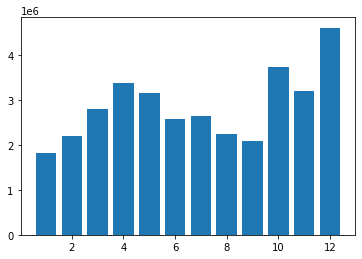

In [85]:
months = range(1,13)
plt.bar(x=months,height=sales_value)

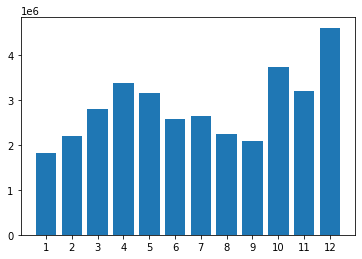

In [87]:
months = range(1,13)
plt.bar(x=months,height=sales_value)
#appear 1,3,5,7,.. :
plt.xticks(months);

Text(0, 0.5, 'Sales_value(USD)')

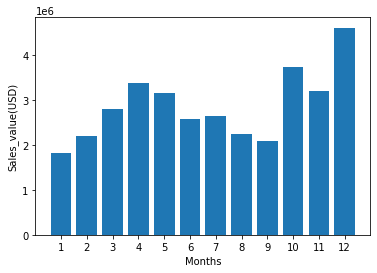

In [89]:
months = range(1,13)
plt.bar(x=months,height=sales_value)
plt.xticks(months);
plt.xlabel('Months')
plt.ylabel('Sales_value(USD)')

# What city has the best sales?

In [90]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [97]:
df_12month['Purchase Address'].apply(lambda x:x.split(',')[1])

0                Austin
1                Austin
2                Austin
3         San Francisco
4         San Francisco
              ...      
12006     San Francisco
12007            Boston
12008           Seattle
12009     San Francisco
12010       Los Angeles
Name: Purchase Address, Length: 185950, dtype: object

In [94]:
df_12month['City'] = df_12month['Purchase Address'].apply(lambda x:x.split(',')[1])

In [95]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [99]:
df_12month.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [100]:
#groupby => return alphabet
sale_city = df_12month.groupby('City').sum()['Sales']
sale_city.max()

8262204.0

In [116]:
print(sale_city)

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32


In [120]:
#cities = set(df_12month['City']) 
#or
cities = df_12month['City'].unique()
print(cities)
########but this is not Alphabet 

[' Austin' ' San Francisco' ' Boston' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' New York City' ' Seattle']


In [125]:
#Change to alphabet
sorted(cities)

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

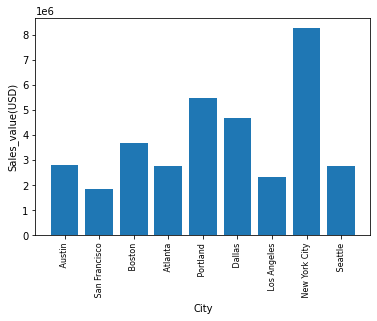

In [126]:
# Wrong match ctities and sale_city if we don't use sorted(cities)
plt.bar(x=cities,height=sale_city)
plt.xticks(cities,rotation=90,size=8);
plt.xlabel('City')
plt.ylabel('Sales_value(USD)');

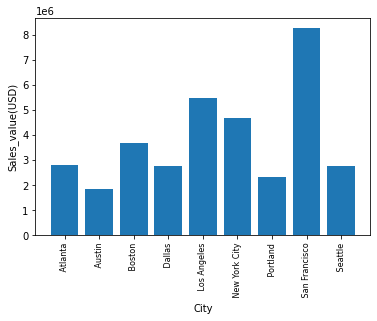

In [113]:
#Use sorted(cities) to change its to alphabet ==> match the sale_city now
plt.bar(x=sorted(cities),height=sale_city)
plt.xticks(cities,rotation=90,size=8)
plt.xlabel('City')
plt.ylabel('Sales_value(USD)');

# What time should we display ads to maximize the likelihood of customer's buying product?

In [127]:
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [129]:
#object to datetime
df_12month['Order Date'].dtype

dtype('O')

In [131]:
df_12month['Order Date']=pd.to_datetime(df_12month['Order Date'])

In [133]:
print(df_12month['Order Date'].dtype)

datetime64[ns]


In [134]:
df_12month['Order Date'].dt.hour

0        20
1        20
2        20
3         5
4         0
         ..
12006    22
12007    16
12008     7
12009    12
12010     8
Name: Order Date, Length: 185950, dtype: int64

In [135]:
df_12month['Hours']= df_12month['Order Date'].dt.hour
df_12month.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [142]:
sales_hours = df_12month.groupby('Hours').sum()['Sales']
print(sales_hours)

Hours
0     7.137212e+05
1     4.608669e+05
2     2.348514e+05
3     1.457579e+05
4     1.626610e+05
5     2.306798e+05
6     4.481130e+05
7     7.448541e+05
8     1.192349e+06
9     1.639031e+06
10    1.944287e+06
11    2.300610e+06
12    2.316821e+06
13    2.155390e+06
14    2.083673e+06
15    1.941550e+06
16    1.904601e+06
17    2.129362e+06
18    2.219348e+06
19    2.412938e+06
20    2.281716e+06
21    2.042001e+06
22    1.607549e+06
23    1.179304e+06
Name: Sales, dtype: float32


In [145]:
hours = set(df_12month['Hours'])
print(hours)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [146]:
sorted(hours)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

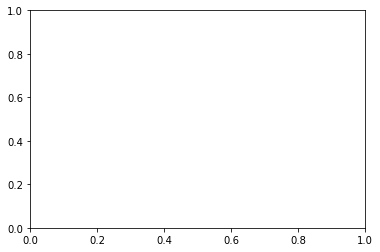

In [151]:
plt.bar(x=hours,height=sales_hours)
plt.xticks(hours,rotation=90,size=8)
plt.xlabel('Hour')
plt.ylabel('Sales_value(USD)')
plt.show()